# Regresiones Lineales Simples

En este notebook, analizaremos la relación entre la altura y el peso de las personas. Contestaremos las siguientes preguntas:

- ¿Existe una relación entre peso y altura?
- En caso de existir, ¿será una relación lineal?
- ¿Se podrá predecir el peso de una persona a partir de su altura?
- ¿Cuán buena podría ser esa predicción?

Para esto, tomaremos el dataset SOCR Human Height/Weight. Más información en el siguiente link:
http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights

Link al dataset:
http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SOCR-HeightWeight.csv', index_col=0)

In [3]:
df.columns = ['Height', 'Weight']

In [4]:
df

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
...,...,...
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655


<Axes: xlabel='Height', ylabel='Weight'>

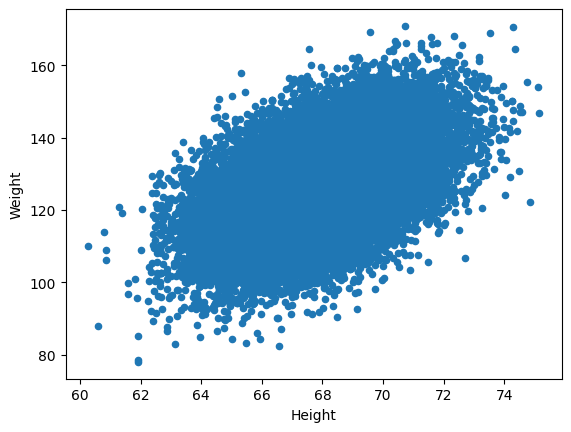

In [6]:
df.plot(kind='scatter', x='Height', y='Weight')

In [7]:
df.corr()

,Height,Weight
Height,1.000000,0.502859
Weight,0.502859,1.000000


# Hipótesis de Trabajo

"El peso de un individuo depende de su altura, y tiene una relación lineal."

In [8]:
import statsmodels.formula.api as smf

In [9]:
lm = smf.ols(data=df, formula="Weight ~ Height").fit()

In [10]:
lm.params

,0
Intercept,-82.575743
Height,3.083476


In [11]:
lm.params[0]

/tmp/ipython-input-4039256094.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lm.params[0]


np.float64(-82.57574306454089)

In [12]:
lm.params[1]

/tmp/ipython-input-1630149547.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lm.params[1]


np.float64(3.0834764454029653)

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     8461.
Date:                Wed, 04 Feb 2026   Prob (F-statistic):               0.00
Time:                        09:29:31   Log-Likelihood:                -93235.
No. Observations:               25000   AIC:                         1.865e+05
Df Residuals:                   24998   BIC:                         1.865e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -82.5757      2.280    -36.214      0.000     -87.045     -78.106
Height         3.0835      0.034     91.981      0.000       3.018       3.149
==============================================================================
Omnibus:                        1.022   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                1.027
Skew:                          -0.016   Prob(JB):                        0.598
Kurtosis:                       2.996   Cond. No.                     2.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Realizando Predicciones

In [14]:
x = pd.DataFrame([60, 65, 70, 75, 80], columns=['Height'])
x

,Height
0,60
1,65
2,70
3,75
4,80


In [15]:
lm.predict(x)

,0
0,102.432844
1,117.850226
2,133.267608
3,148.684990
4,164.102373


### Inspeccionando los resultados

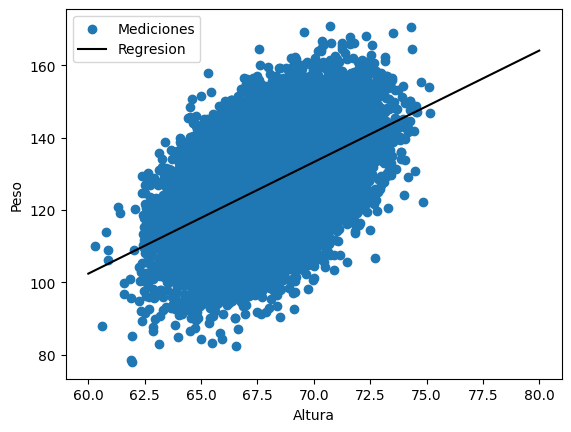

In [16]:
plt.scatter(df['Height'], df['Weight'], label='Mediciones')
plt.plot(x,lm.predict(x), c='black', label='Regresion')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.legend(loc=0)

### Análisis de Residuales

In [17]:
y_pred = lm.predict(df['Height'])
y_true = df['Weight']

<Axes: ylabel='Density'>

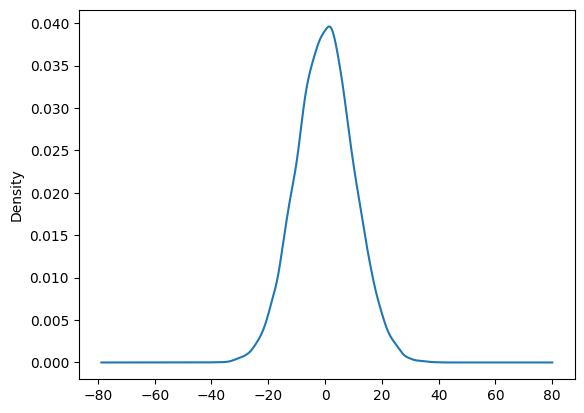

In [18]:
(y_pred - y_true).plot(kind='kde')

## Métricas de Evaluación del Modelo


In [19]:
import statsmodels.tools.eval_measures as metrics

In [20]:
# Mean Absolute Error
metrics.meanabs(y_true,y_pred)

np.float64(8.037502348939364)

In [21]:
# Mean Squared Error
metrics.mse(y_true,y_pred)

np.float64(101.58853248632849)

In [22]:
# Root Medium Squared Error
metrics.rmse(y_true,y_pred)

np.float64(10.079113675632819)

In [23]:
# r2
lm.rsquared

np.float64(0.25286669174288057)